In [ ]:
!pip install -q drawdata

**Credits**


Based on https://github.com/probabl-ai/youtube-appendix/blob/main/04-drawing-data/notebook.ipynb

Use awesome **drawdata** package for interactive data generation

In [ ]:
from drawdata import ScatterWidget

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from IPython.display import HTML, display
import ipywidgets as widgets

import matplotlib.pylab as plt
import numpy as np
import ipywidgets

In [ ]:
widget = ScatterWidget()
output = widgets.Output()

@output.capture(clear_output=True)
def on_change(change):
    df = widget.data_as_pandas
    if len(df) and (df['color'].nunique() > 1):
        X = df[['x', 'y']].values
        y = df['color']
        display(HTML("<br><br><br>"))

        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

        # Train and plot Decision Tree Classifier
        tree_classifier = DecisionTreeClassifier(max_depth=3).fit(X, y)
        disp_tree = DecisionBoundaryDisplay.from_estimator(
            tree_classifier, X,
            response_method="predict_proba" if len(np.unique(df['color'])) == 2 else "predict",
            xlabel="x", ylabel="y",
            alpha=0.5,
            ax=ax1
        )
        disp_tree.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        ax1.set_title(f"{tree_classifier.__class__.__name__}")

        # Train and plot Gradient Boosting Classifier
        boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X, y)
        disp_boosting = DecisionBoundaryDisplay.from_estimator(
            boosting_classifier, X,
            response_method="predict_proba" if len(np.unique(df['color'])) == 2 else "predict",
            xlabel="x", ylabel="y",
            alpha=0.5,
            ax=ax2
        )
        disp_boosting.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        ax2.set_title(f"{boosting_classifier.__class__.__name__}")

        plt.show()

widget.observe(on_change, names=["data"])
on_change(None)
widgets.HBox([widget, output])

In [ ]:
widget = ScatterWidget()
output = ipywidgets.Output()


@output.capture(clear_output=True)
def on_change(change):
    df = widget.data_as_pandas
    if len(df) and (df['color'].nunique() > 1):
        X = df[['x', 'y']].values
        y = df['color']
        display(HTML("<br><br><br>"))
        fig = plt.figure(figsize=(12, 12));
        classifier = RandomForestClassifier(max_depth=5).fit(X, y)
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier, X,
            response_method="predict_proba" if len(np.unique(df['color'])) == 2 else "predict",
            xlabel="x", ylabel="y",
            alpha=0.5,
        );
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k");
        plt.title(f"{classifier.__class__.__name__}");
        plt.show();

widget.observe(on_change, names=["data"])
on_change(None)
ipywidgets.HBox([widget, output])

### Logistic Regression
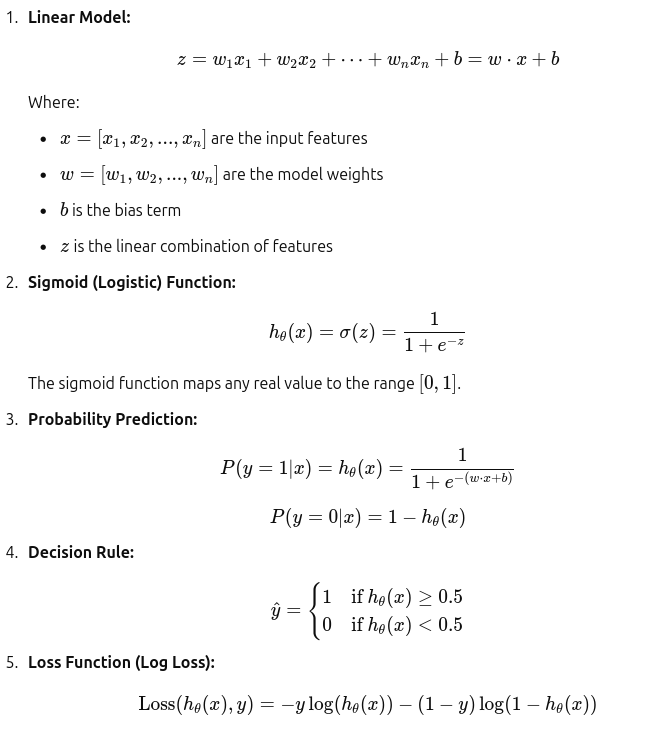

### Decision Tree Classifier
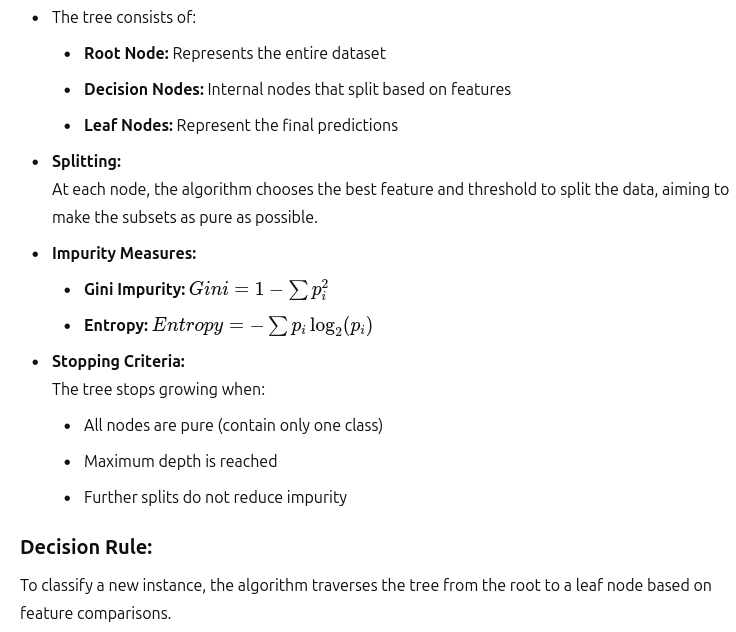

### RandomForest Classifier
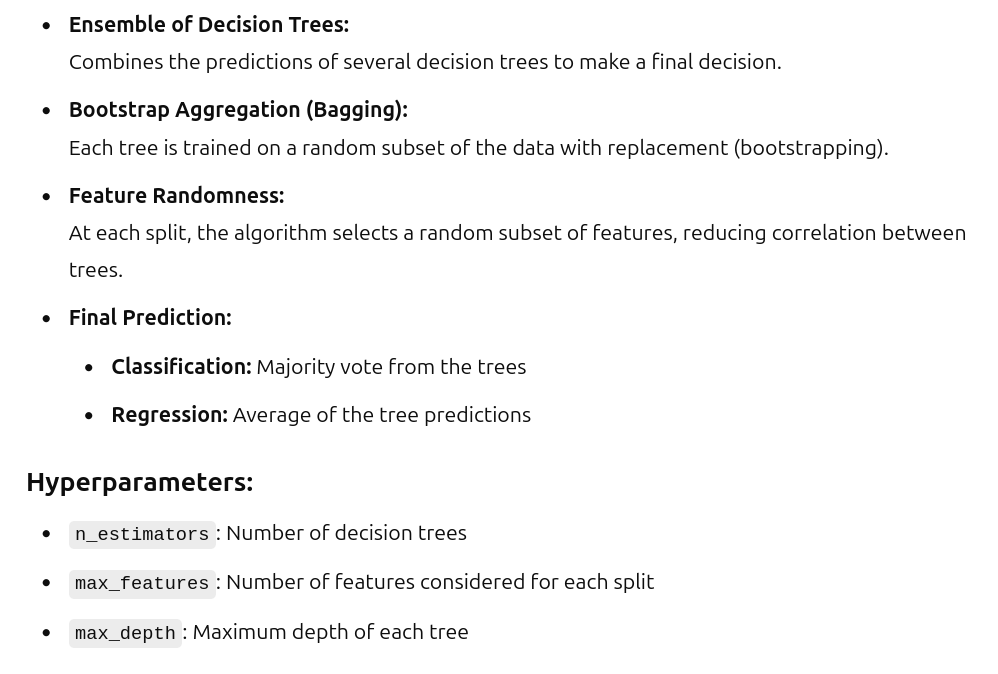

### Gradient Boosting

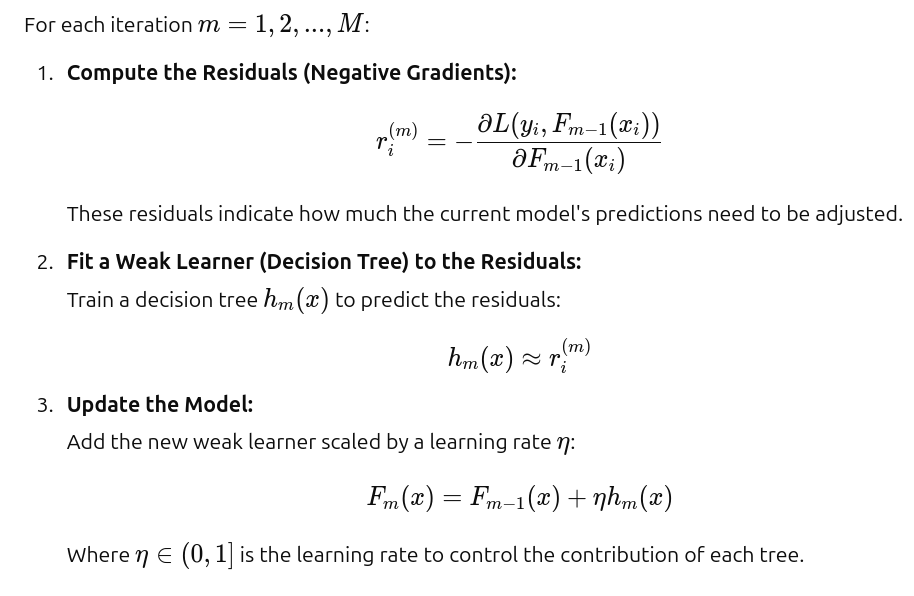